In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.shape

(284807, 31)

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [14]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [16]:
data = fraud.append(non_fraud, ignore_index=True)
data.head()
data['Class'].value_counts()
x = data.drop('Class', axis = 1)
y = data['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

/var/folders/lh/5ygw_3jn0yn647m04qnb1xzr0000gn/T/ipykernel_72529/3291151614.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = fraud.append(non_fraud, ignore_index=True)


In [18]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [20]:
#strandardizes the features removing the mean and scaling to unit varience
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [21]:
x_test = scaler.transform(x_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
x_train.shape

(787, 30)

In [22]:
x_test.shape

(197, 30)

In [24]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

In [26]:
#building CNN model
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape =x_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

In [27]:
model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [28]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

In [29]:
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)           

In [32]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])

In [34]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/20


2023-06-01 00:46:13.996546: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


25/25 [==============================] - 1s 6ms/step - loss: 0.8032 - accuracy: 0.6226 - val_loss: 0.6213 - val_accuracy: 0.7563
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4462 - accuracy: 0.8158 - val_loss: 0.5764 - val_accuracy: 0.7310
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.8666 - val_loss: 0.5437 - val_accuracy: 0.7360
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3466 - accuracy: 0.8729 - val_loss: 0.5071 - val_accuracy: 0.7817
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3148 - accuracy: 0.8945 - val_loss: 0.4655 - val_accuracy: 0.8223
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2497 - accuracy: 0.9085 - val_loss: 0.4269 - val_accuracy: 0.8579
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2516 - accuracy: 0.9009 - val_loss: 0.3891 - val_accuracy: 0.8883
Epoch 8/20
25/25 [=============

In [40]:
#plotting accuracy value
def plot_learningCurve(history, epoch):
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
#plotting training and validation loss value
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

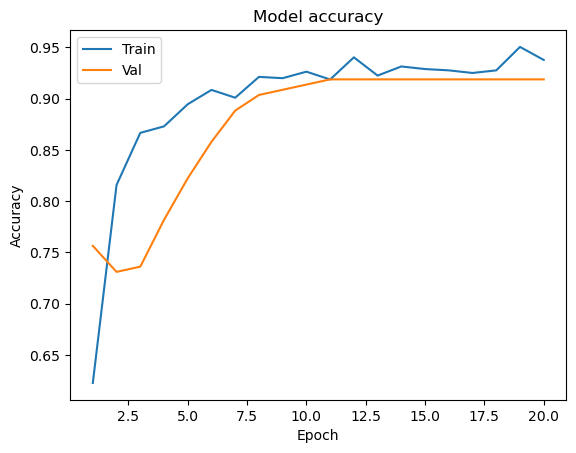

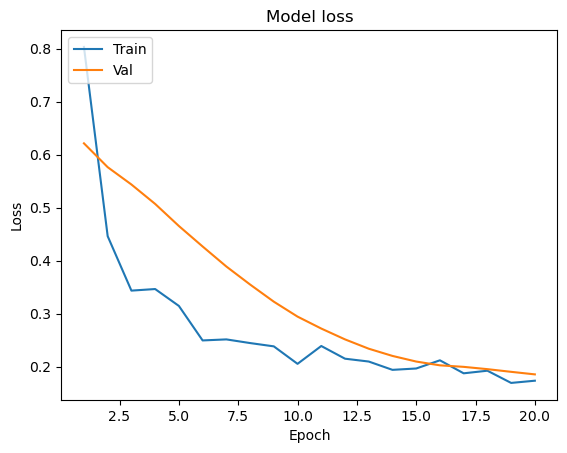

In [41]:
plot_learningCurve(history, epochs)

In [42]:
#adding maxpool layer
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

In [43]:
model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

In [44]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

In [45]:
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy',
metrics=['accuracy'])

In [50]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
25/25 [==============================] - 1s 5ms/step - loss: 0.9561 - accuracy: 0.5769 - val_loss: 0.6591 - val_accuracy: 0.7360
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.7820 - accuracy: 0.6607 - val_loss: 0.6234 - val_accuracy: 0.7970
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.7382 - val_loss: 0.5926 - val_accuracy: 0.7665
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6015 - accuracy: 0.7433 - val_loss: 0.5605 - val_accuracy: 0.7665
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.7662 - val_loss: 0.5263 - val_accuracy: 0.7716
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.7992 - val_loss: 0.4961 - val_accuracy: 0.7716
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.8208 - val_loss: 0.4662 - val_accuracy: 0.7817
Epoch 8/50
25/25 [==

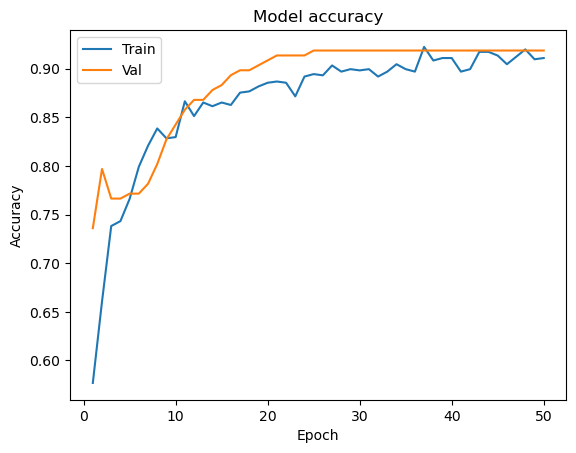

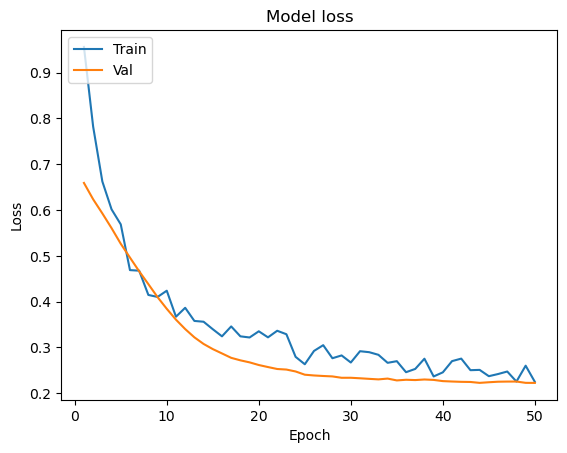

In [51]:
plot_learningCurve(history, epochs)